In [288]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [289]:
titanic = sns.load_dataset('./titanic')

In [290]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [291]:
titanic.isna().sum()/titanic.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [292]:
titanic.drop_duplicates(inplace=True)

In [293]:
titanic.isna().sum()/titanic.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.135204
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002551
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.742347
embark_town    0.002551
alive          0.000000
alone          0.000000
dtype: float64

In [294]:
titanic.dropna(subset=["embarked","embark_town"],inplace=True)

In [295]:
titanic.isna().sum()/titanic.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.135550
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.744246
embark_town    0.000000
alive          0.000000
alone          0.000000
dtype: float64

In [296]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     782 non-null    int64  
 1   pclass       782 non-null    int64  
 2   sex          782 non-null    object 
 3   age          676 non-null    float64
 4   sibsp        782 non-null    int64  
 5   parch        782 non-null    int64  
 6   fare         782 non-null    float64
 7   embarked     782 non-null    object 
 8   class        782 non-null    object 
 9   who          782 non-null    object 
 10  adult_male   782 non-null    bool   
 11  deck         200 non-null    object 
 12  embark_town  782 non-null    object 
 13  alive        782 non-null    object 
 14  alone        782 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 87.1+ KB


In [297]:
titanic.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
186,1,3,female,NaN,1,0,15.5000,Q,Third,woman,False,NaN,Queenstown,yes,False
261,1,3,male,3.0,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False
548,0,3,male,33.0,1,1,20.5250,S,Third,man,True,NaN,Southampton,no,False
270,0,1,male,NaN,0,0,31.0000,S,First,man,True,NaN,Southampton,no,True
842,1,1,female,30.0,0,0,31.0000,C,First,woman,False,NaN,Cherbourg,yes,True
864,0,2,male,24.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
841,0,2,male,16.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
176,0,3,male,NaN,3,1,25.4667,S,Third,man,True,NaN,Southampton,no,False
779,1,1,female,43.0,0,1,211.3375,S,First,woman,False,B,Southampton,yes,False
234,0,2,male,24.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True


In [298]:
titanic.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


In [299]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [300]:
titanic.drop(columns=['alive','who'],inplace=True)

In [301]:
titanic.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
163,0,3,male,17.0,0,0,8.6625,S,Third,True,NaN,Southampton,True
423,0,3,female,28.0,1,1,14.4000,S,Third,False,NaN,Southampton,False
813,0,3,female,6.0,4,2,31.2750,S,Third,False,NaN,Southampton,False
562,0,2,male,28.0,0,0,13.5000,S,Second,True,NaN,Southampton,True
497,0,3,male,NaN,0,0,15.1000,S,Third,True,NaN,Southampton,True


In [302]:
titanic["deck"].value_counts(),titanic["embark_town"].value_counts(),titanic["sex"].value_counts(),titanic["adult_male"].value_counts()

(deck
 C    59
 B    44
 D    33
 E    32
 A    15
 F    13
 G     4
 Name: count, dtype: int64,
 embark_town
 Southampton    568
 Cherbourg      155
 Queenstown      59
 Name: count, dtype: int64,
 sex
 male      491
 female    291
 Name: count, dtype: int64,
 adult_male
 True     451
 False    331
 Name: count, dtype: int64)

##### So, in adult_male column, false value, there is female counts too !  

In [303]:
titanic["age"] = titanic["age"].fillna(0)

##### just checking to plot the bar graph between gender and age ! so that i can have a clear view on how age is divided with gender.

In [304]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
adult_male       0
deck           582
embark_town      0
alone            0
dtype: int64

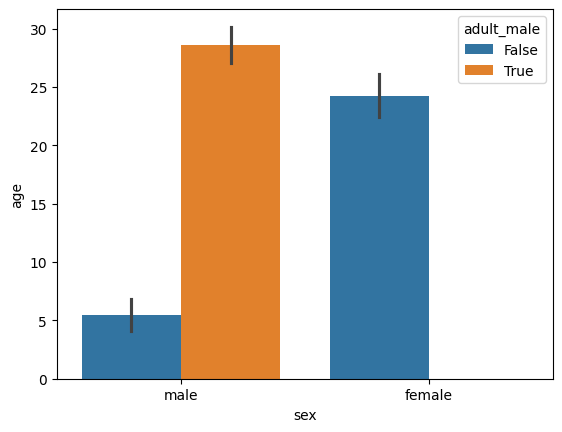

In [305]:
sns.barplot(data=titanic,y="age",x="sex",hue="adult_male")
plt.show()

##### Okay , so we will add a custom logic, 
<p>If, adult_male = True, then we will take the age column with value greater than 18 and fill only those column where adult_male = True with mean ! </p></br>
<p>If, adult_male = False and Sex=Female then we will take the age column corresponding to female sex column and generate the mean and if adult_male = False and sex=Male then we will take the age column corresponding to male sex column and generate the mean of it ! </p>
<p>Right now, we have replaced null value with 0, so we need to create a function to replace 0 with a valid age </p>

In [306]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     782 non-null    int64  
 1   pclass       782 non-null    int64  
 2   sex          782 non-null    object 
 3   age          782 non-null    float64
 4   sibsp        782 non-null    int64  
 5   parch        782 non-null    int64  
 6   fare         782 non-null    float64
 7   embarked     782 non-null    object 
 8   class        782 non-null    object 
 9   adult_male   782 non-null    bool   
 10  deck         200 non-null    object 
 11  embark_town  782 non-null    object 
 12  alone        782 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 74.8+ KB


In [307]:
titanic[titanic["adult_male"]==True]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,True
5,0,3,male,0.0,0,0,8.4583,Q,Third,True,NaN,Queenstown,True
6,0,1,male,54.0,0,0,51.8625,S,First,True,E,Southampton,True
12,0,3,male,20.0,0,0,8.0500,S,Third,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0,3,male,20.0,0,0,9.8458,S,Third,True,NaN,Southampton,True
881,0,3,male,33.0,0,0,7.8958,S,Third,True,NaN,Southampton,True
883,0,2,male,28.0,0,0,10.5000,S,Second,True,NaN,Southampton,True
889,1,1,male,26.0,0,0,30.0000,C,First,True,C,Cherbourg,True


In [308]:
adult_male = titanic[(titanic["adult_male"] == True) & (titanic["age"] != 0)]

In [309]:

adult_male[((adult_male["age"] < 18)    &   (adult_male["age"] !=  0))].shape

(16, 13)

##### Here, above this shows the faulty values in our data , age is less than 18 yet he is considered an adult ! so lets remove this data from our adult_male dataFrame 

In [310]:
adult_male[((adult_male["age"] < 18)    &   (adult_male["age"] !=  0))]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
86,0,3,male,16.0,1,3,34.3750,S,Third,True,NaN,Southampton,False
138,0,3,male,16.0,0,0,9.2167,S,Third,True,NaN,Southampton,True
163,0,3,male,17.0,0,0,8.6625,S,Third,True,NaN,Southampton,True
220,1,3,male,16.0,0,0,8.0500,S,Third,True,NaN,Southampton,True
266,0,3,male,16.0,4,1,39.6875,S,Third,True,NaN,Southampton,False
282,0,3,male,16.0,0,0,9.5000,S,Third,True,NaN,Southampton,True
333,0,3,male,16.0,2,0,18.0000,S,Third,True,NaN,Southampton,False
433,0,3,male,17.0,0,0,7.1250,S,Third,True,NaN,Southampton,True
532,0,3,male,17.0,1,1,7.2292,C,Third,True,NaN,Cherbourg,False
550,1,1,male,17.0,0,2,110.8833,C,First,True,C,Cherbourg,False


##### okay okay , confused, lets check if in our data, adult male is considered above 18 or 16 ! 

In [311]:
titanic.shape

(782, 13)

In [312]:
print(titanic[(titanic["age"] < 18) & (titanic["adult_male"] == False) & (titanic["age"] != 0)].shape)
print(adult_male[(adult_male["age"] < 18) & (adult_male["adult_male"] == True) & (adult_male["age"] != 0)].shape)


(94, 13)
(16, 13)


In [313]:
adult_male.shape

(382, 13)

##### okay , we compared the entire dataset with the adult ones , and guess that the relation of adult_male being less than 18 is faulty and hence we will remove those column from the Adult_male dataframe 

In [314]:
adult_male_filtered = adult_male[~((adult_male["age"] < 18)    &   (adult_male["age"] !=  0))]

In [315]:
adult_male_filtered[adult_male_filtered["age"]==0].shape

(0, 13)

Now, we have got the filtered adult_male dataset, so let's calculate the age mean and fill the age column in the titanic with the mean value ! 

In [316]:
adult_male_age_mean = adult_male_filtered["age"].mean()

In [317]:
adult_male_age_mean

34.474043715846996

let's fill up the titanic dataset for adult_male, whose age is 0 (as we have added earlier) and age >= 18, also lets remove the age <18 and adult_male == True from the titanic dataset before we fill our pot ! 

In [318]:
titanic = titanic[~((titanic["age"] < 18) & (titanic["adult_male"]==True) & (titanic["age"] !=0))]

In [319]:
titanic.shape

(766, 13)

In [320]:
titanic[(titanic["age"] == 0)  & (titanic["adult_male"] == True)].shape

(69, 13)

Okay now lets apply the logic ! 

In [321]:
titanic.loc[
    (titanic["age"] == 0) & 
    (titanic["adult_male"] == True) & 
    (titanic["sex"] == "male"),
    "age"
] = adult_male_age_mean

NOW, CHECKING ........

In [322]:
titanic[(titanic["age"] == 0)  & (titanic["adult_male"] == True) & (titanic["sex"] == "male")].shape

(0, 13)

In [323]:
titanic['age'].value_counts()

age
34.474044    69
0.000000     37
24.000000    29
18.000000    25
22.000000    24
             ..
36.500000     1
0.920000      1
23.500000     1
55.500000     1
74.000000     1
Name: count, Length: 90, dtype: int64

Okay, so we are done with filling the value for adult male using the mean, now lets follow the same process and do it for adult_male == false , who are not female (remember in this dataset , adult_male == false is taking account for women too ! )